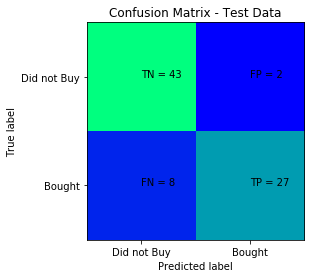

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the data
Soc_net_data=pd.read_csv('Social_Network_Ads.csv')

#changing categorical to numeric values
# Soc_net_data.Gender[Soc_net_data.Gender == 'Male'] =1
# Soc_net_data.Gender[Soc_net_data.Gender == 'Female'] =2

#Splitting the Data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(Soc_net_data.iloc[:,2:-1], Soc_net_data.iloc[:,-1], test_size=0.2, random_state=20)

#Normalizing the data - Z score normalization
Std_scaler = StandardScaler()
X_train = Std_scaler.fit_transform(X_train)
X_test = Std_scaler.transform(X_test)

#Fitting the function
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,y_train)

#Predicting the classes
Prediction = Logistic_R.predict(X_test)

#Ploting the results
# Source : https://tatwan.github.io/How-To-Plot-A-Confusion-Matrix-In-Python/
def plot_simple_confusion_matrix(Actual_class,Predicted_class):
    
    cm=confusion_matrix(Actual_class,Predicted_class)
    plt.imshow(cm, cmap=plt.cm.winter)
    classNames = ['Did not Buy','Bought']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

plot_simple_confusion_matrix(y_test,Prediction)